#### An American multinational corporation called IBM has operations in almost 170 nations and dominates the software, hardware, and computing industries. For businesses that offer services and rely on their qualified and experienced employees as their most valuable resources, attrition is a significant concern. The company wants to understand the elements that contribute to employee attrition.
#### Objective:
#### 1.Exploratory Data Analysis and Data Visualization with Pandas & Matplotlib
#### 2.Machine Learning Supervised Linear Regression 
#### 3.Machine Learning Supervised Logistic Regression 


## importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
plt.style.use('seaborn-darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
df = pd.read_csv('IBMDataset.csv')

In [3]:
# show first 10 rows of dataset
df.head(10)

,Age,EmpNum,AttritionNum,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,...,3,1,0,8,0,1,6,4,0,5
1,49,2,0,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,...,4,4,1,10,3,3,10,7,1,7
2,37,3,1,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,...,3,2,0,7,3,3,0,0,0,0
3,33,4,0,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,...,3,3,0,8,3,3,8,7,3,0
4,27,5,0,No,Travel_Rarely,591,Research & Development,2,1,Medical,...,3,4,1,6,3,3,2,2,2,2
5,32,6,0,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,...,3,3,0,8,2,2,7,7,3,6
6,59,7,0,No,Travel_Rarely,1324,Research & Development,3,3,Medical,...,4,1,3,12,3,2,1,0,0,0
7,30,8,0,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,...,4,2,1,1,2,3,1,0,0,0
8,38,9,0,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,...,4,2,0,10,2,3,9,7,1,8
9,36,10,0,No,Travel_Rarely,1299,Research & Development,27,3,Medical,...,3,2,2,17,3,2,7,7,7,7


## Exploratory data analysis (EDA)

In [4]:
#checking shape of dataset
print(df.shape)

(1470, 33)


In [5]:
#checking datatypes
df.dtypes

Age                          int64
EmpNum                       int64
AttritionNum                 int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

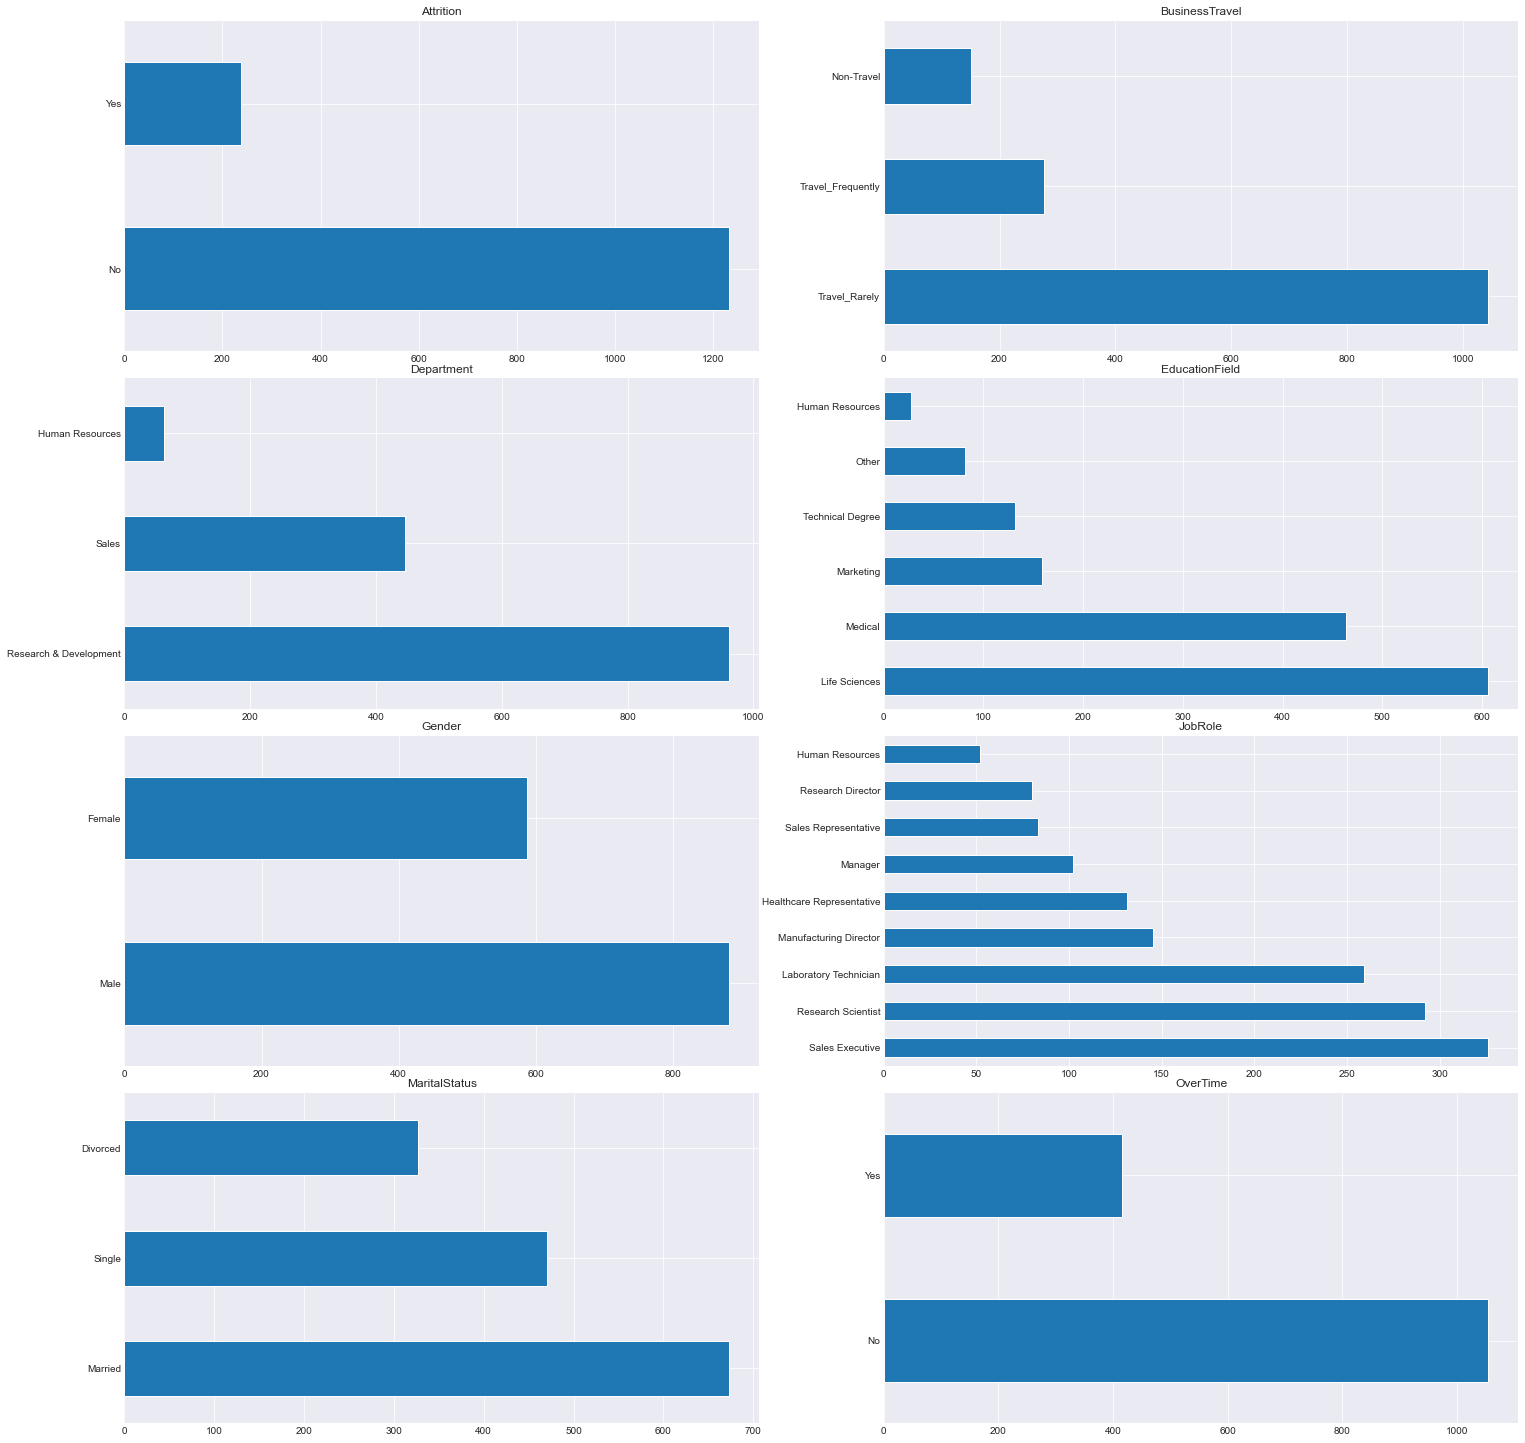

In [6]:
# plot categorical datatypes with their value count 
categorical_d_types = df.select_dtypes(include= 'object').columns
fig, ax = plt.subplots(4,2, figsize = (20,20))
fig.tight_layout(w_pad = 10.0)
axs = ax.ravel()
for i, clm in enumerate(categorical_d_types):
    df[clm].value_counts().plot.barh(ax = axs[i])
    axs[i].set_title(clm)

<AxesSubplot:>

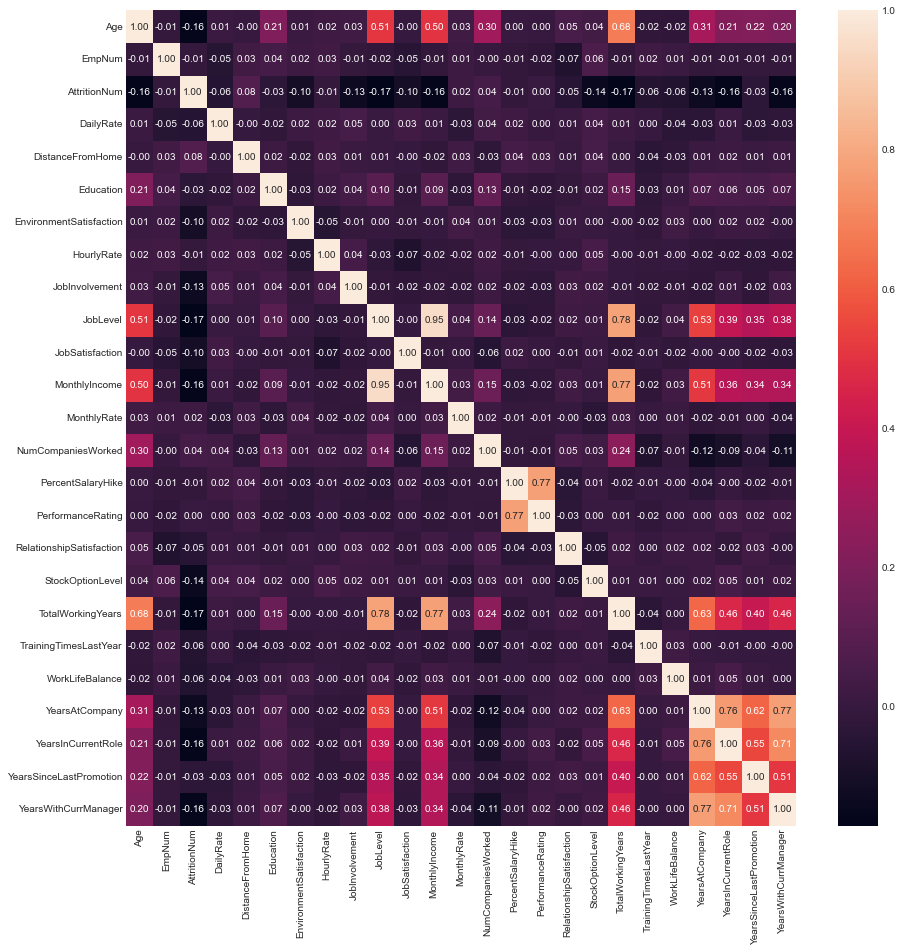

In [7]:
#plot correlation matrix
fig,ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,ax=ax, fmt='.2f')

Here we found small correlation between 'income' and 'satisfaction' and,
high correlation between 'income' and 'years worked at company'.

<AxesSubplot:ylabel='EducationField'>

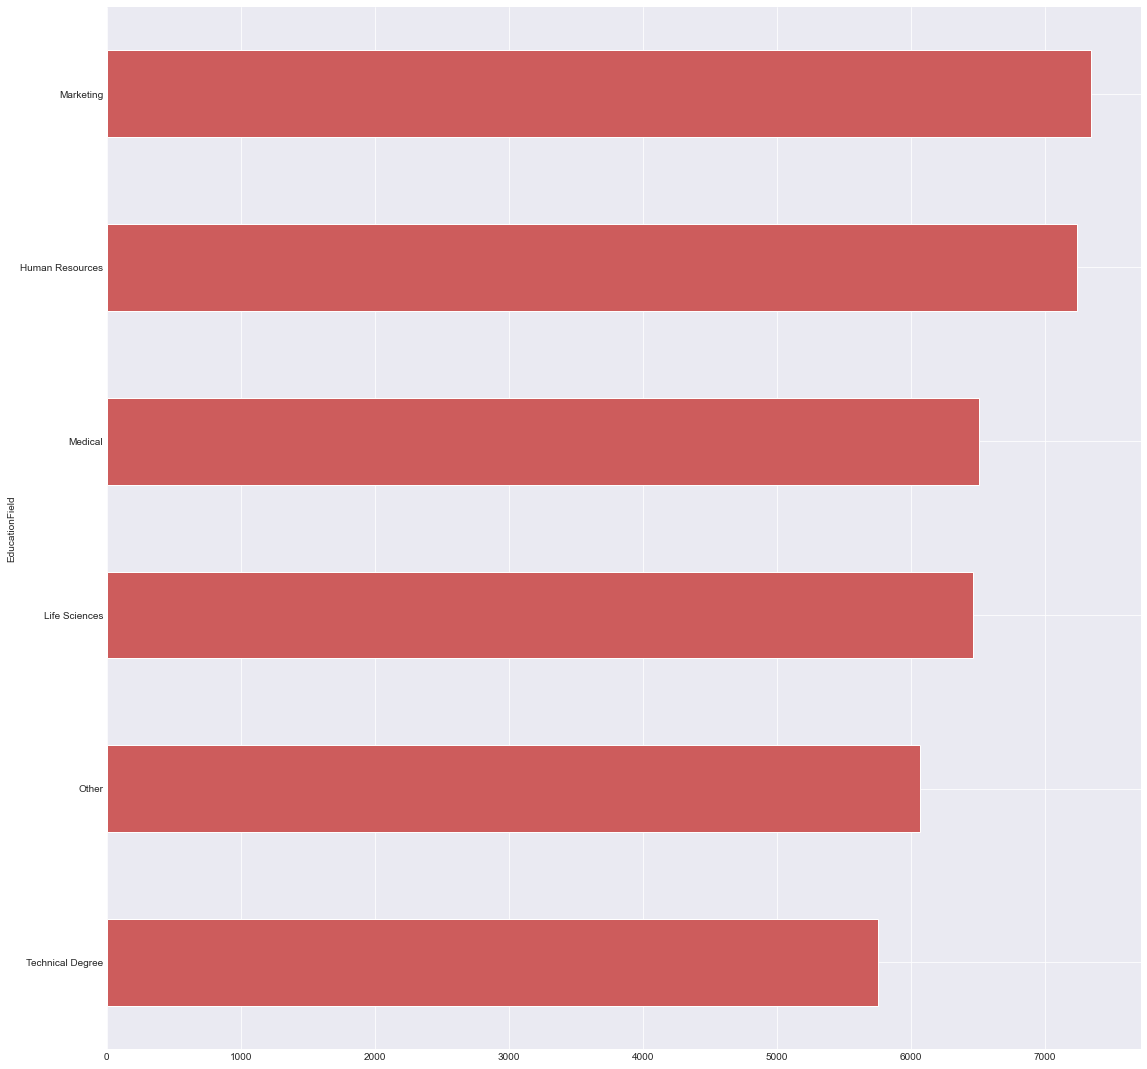

In [8]:
# plot of income based on EducationField
fig, ax = plt.subplots(1,1, figsize = (15,15))
fig.tight_layout(w_pad=11)
df.groupby(by = 'EducationField').mean()['MonthlyIncome'].sort_values().plot.barh(ax = ax, color = 'indianred')

<AxesSubplot:ylabel='MaritalStatus'>

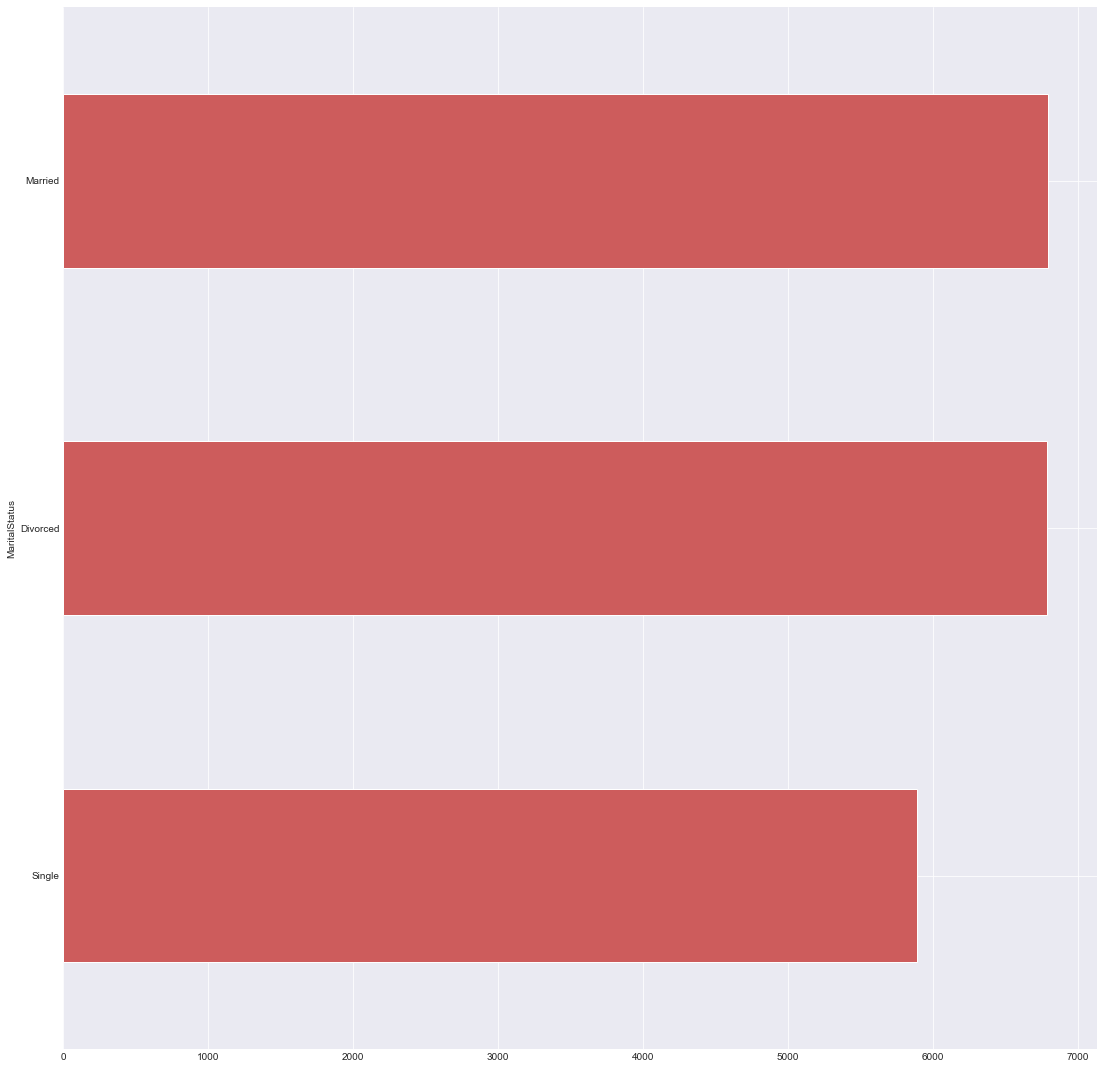

In [9]:
# plot of income based on MaritalStatus
fig, ax = plt.subplots(1,1, figsize = (15,15))
fig.tight_layout(w_pad=11)
df.groupby(by = 'MaritalStatus').mean()['MonthlyIncome'].sort_values().plot.barh(ax = ax, color = 'indianred')

<AxesSubplot:ylabel='JobRole'>

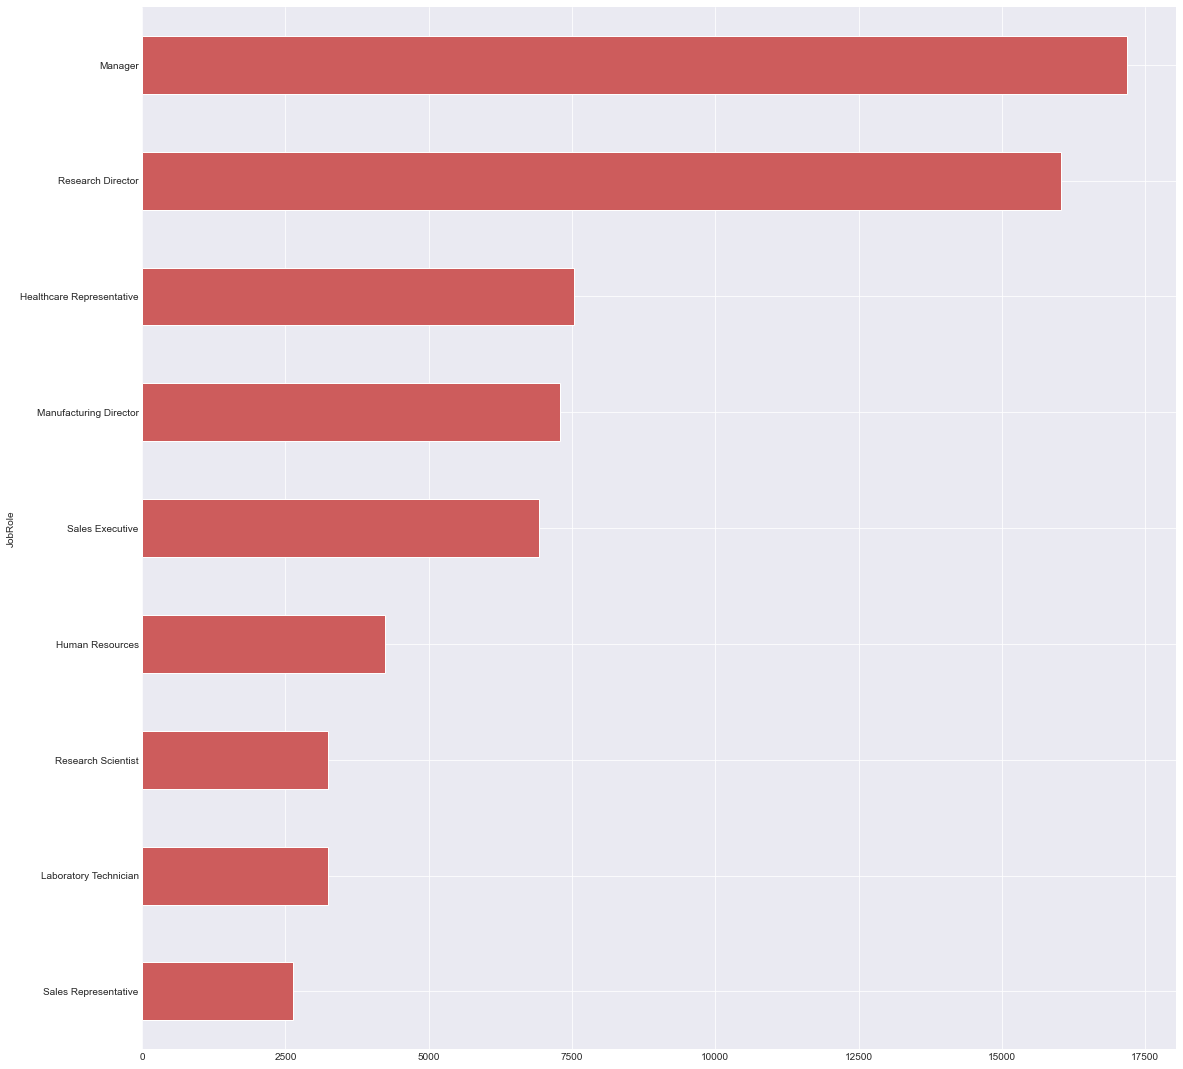

In [10]:
# plot of income based on JobRole
fig, ax = plt.subplots(1,1, figsize = (15,15))
fig.tight_layout(w_pad=11)
df.groupby(by = 'JobRole').mean()['MonthlyIncome'].sort_values().plot.barh(ax = ax, color = 'indianred')

<AxesSubplot:ylabel='Gender'>

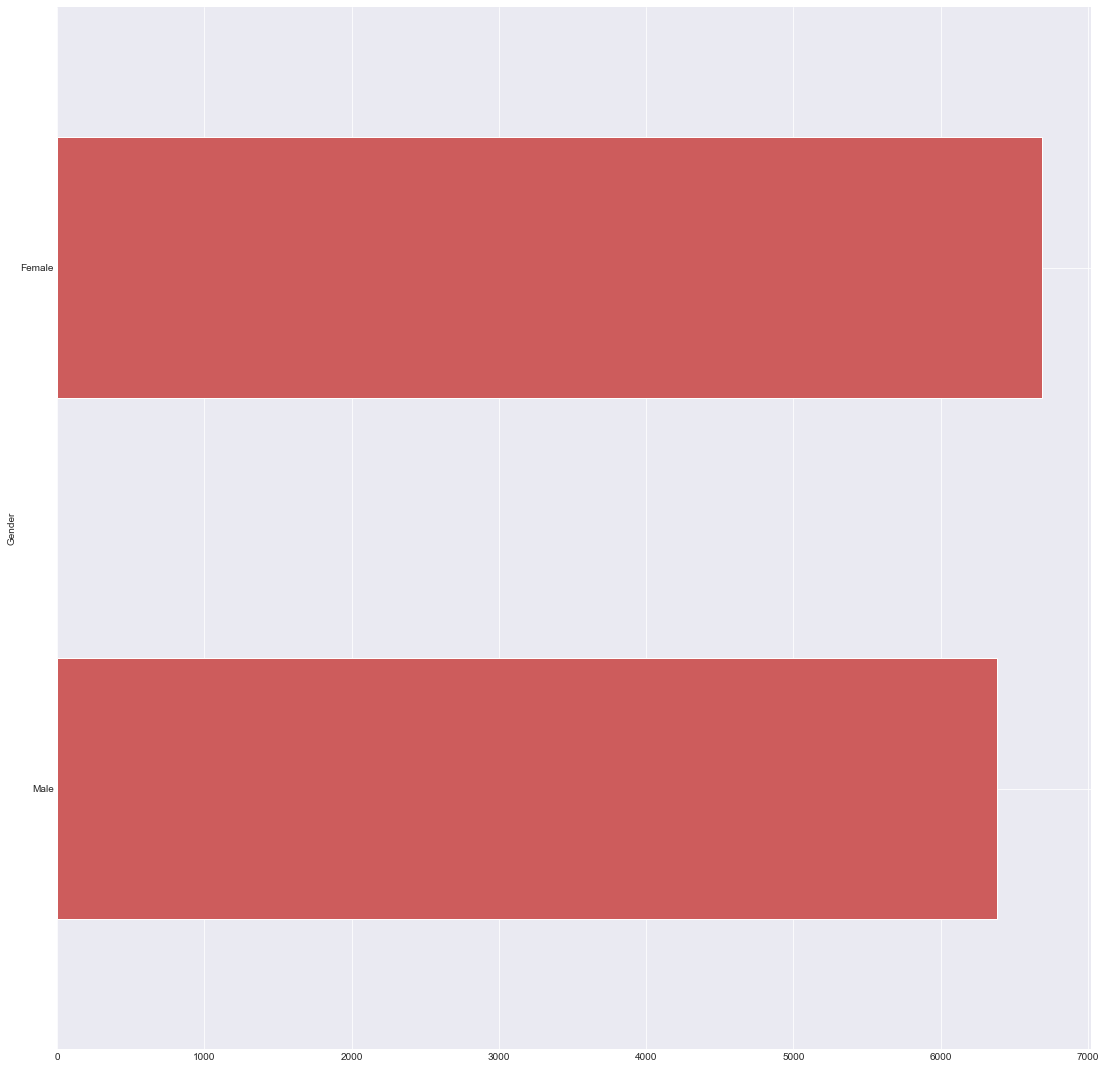

In [11]:
# plot of income based on Gender
fig, ax = plt.subplots(1,1, figsize = (15,15))
fig.tight_layout(w_pad=11)
df.groupby(by = 'Gender').mean()['MonthlyIncome'].sort_values().plot.barh(ax = ax, color = 'indianred')

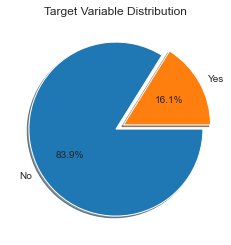

In [12]:
#analsis of the distribution of the target variable

target_varibale = 'Attrition'
labels = ['Yes','No']

M_A_P={}
for e, i in enumerate(df[target_varibale].unique()):
    M_A_P[i]=labels[e]
#MAP={0:'Not-Survived',1:'Survived'}
dfcopy = df.copy()
dfcopy[target_varibale]=dfcopy[target_varibale].map(M_A_P)
explode=np.zeros(len(labels))
explode[-1]=0.1
plt.title('Target Variable Distribution')
plt.pie(dfcopy[target_varibale].value_counts(), labels=dfcopy[target_varibale].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

From the above plot we can see that the Target Variable is imbalanced so, we can try to balance the data.

In [13]:
#Converting categorical Columns to Numeric
ftrs = [i for i in df.columns.values if i not in [target_varibale]]
nu = df[ftrs].nunique().sort_values()
numericalfeatures = []; categrocicalfeatures = [];  #numerical & categorical features

for i in range(df[ftrs].shape[1]):
    if nu.values[i]<=7:
        categrocicalfeatures.append(nu.index[i])
    else: 
        numericalfeatures.append(nu.index[i])

nvc = pd.DataFrame(dfcopy.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/dfcopy.shape[0],3)*100

e_c_c = nvc[nvc['Percentage']!=0].index.values
d_c_c = [i for i in df.columns if i not in e_c_c]

#Target Variable
M_A_P={}
for i,e in enumerate(dfcopy[target_varibale].unique()):
    M_A_P[e]=i
dfcopy[target_varibale]=dfcopy[target_varibale].map(M_A_P)
print('Mapping Target variable --->',M_A_P)

df_numerical = dfcopy[d_c_c]
f_c_c = [i for i in categrocicalfeatures if i not in e_c_c]

#One-Hot Binay Encoding
o_h=True
d_m=True
for i in f_c_c:
    if df_numerical[i].nunique()==2:
        if o_h==True: print("\033[1m\nOne-Hot Encoding apply on features:\033[0m")
        print(i);o_h=False
        df_numerical[i]=pd.get_dummies(df_numerical[i], drop_first=True, prefix=str(i))
    if (df_numerical[i].nunique()>2 and df_numerical[i].nunique()<17):
        if d_m==True: print("\n\033[1mDummy Encoding apply on features:\033[0m")
        print(i);d_m=False
        df_numerical = pd.concat([df_numerical.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df_numerical[i], drop_first=True, prefix=str(i)))],axis=1)
        
df_numerical.shape

Mapping Target variable ---> {'Yes': 0, 'No': 1}

One-Hot Encoding apply on features:
Gender
PerformanceRating
OverTime
AttritionNum

Dummy Encoding apply on features:
BusinessTravel
Department
MaritalStatus
WorkLifeBalance
JobInvolvement
RelationshipSatisfaction
StockOptionLevel
EnvironmentSatisfaction
JobSatisfaction
Education
JobLevel
EducationField
TrainingTimesLastYear


(1470, 63)

In [14]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   EmpNum                             1470 non-null   int64 
 2   AttritionNum                       1470 non-null   uint8 
 3   Attrition                          1470 non-null   int64 
 4   DailyRate                          1470 non-null   int64 
 5   DistanceFromHome                   1470 non-null   int64 
 6   Gender                             1470 non-null   uint8 
 7   HourlyRate                         1470 non-null   int64 
 8   JobRole                            1470 non-null   object
 9   MonthlyIncome                      1470 non-null   int64 
 10  MonthlyRate                        1470 non-null   int64 
 11  NumCompaniesWorked                 1470 non-null   int64 
 12  OverTi

In [15]:
# label_encoder ON job role column
label_encoder = LabelEncoder()
df_numerical['JobRole']= label_encoder.fit_transform(df_numerical['JobRole'])

In [16]:
#using SMOTE to balance data
dfcpy = df_numerical.copy()

print('Original class distribution:')
print(dfcpy[target_varibale].value_counts())

xf = dfcpy.columns
X = dfcpy.drop([target_varibale],axis=1)
Y = dfcpy[target_varibale]

smote = SMOTE()
X, Y = smote.fit_resample(X, Y)

dfcpy = pd.DataFrame(X, columns=xf)
dfcpy[target_varibale] = Y

print('\nClass distribution after applying SMOTE Technique:',)
print(Y.value_counts())

Original class distribution:
1    1233
0     237
Name: Attrition, dtype: int64

Class distribution after applying SMOTE Technique:
0    1233
1    1233
Name: Attrition, dtype: int64


In [17]:
#Splitting the data intro training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

print('Original set  ---> ',X.shape,Y.shape,
      '\nTraining set  ---> ',X_train.shape,y_train.shape,
      '\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (2466, 62) (2466,) 
Training set  --->  (1972, 62) (1972,) 
Testing set   --->  (494, 62)  (494,)


## Linear  Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
lr = LinearRegression()
lr.fit(X_train, y_train)
print("Score: ",lr.score(X_test,y_test)*100)

Score:  100.0


## Logistic Regression

In [19]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
print("Score: ", model.score(X_test,y_test)*100)

Score:  74.2914979757085
